In [1]:
cd ..

/Users/muhammadfarooq/Codebase/wood-log-detection/Pith2Bark


In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from src.cv_winner import winner_model_rings
from src.damage import merge_df
from src.damage import read_damage_min_max
from src.damage import read_damage_mean

# Damage Dataset

In [3]:
rmse_url = "cv_output/ringsranking_rmse.csv"
rings_url = "cv_output/ringsranking_rings.csv"
df_ringsranking = winner_model_rings(rmse_url, rings_url)

Polar Pith Canny(blur otsu) 12.829 (subseq)


In [4]:
rmse_url = "cv_output/pine_rmse.csv"
rings_url = "cv_output/pine_rings.csv"
df_pine = winner_model_rings(rmse_url, rings_url)

Polar Pith Canny(blur triangle) 19.888 (peaks)


In [5]:
rmse_url = "cv_output/fur_rmse.csv"
rings_url = "cv_output/fur_rings.csv"
df_fur = winner_model_rings(rmse_url, rings_url)

Polar Pith Canny(blur triangle) 13.429 (peaks)


In [6]:
rmse_url = "cv_output/tracy_rmse.csv"
rings_url = "cv_output/tracy_rings.csv"
df_tracy = winner_model_rings(rmse_url, rings_url)

Polar Canny(triangle) 39.684 (peaks)


In [7]:
rmse_url = "cv_output/data_rmse.csv"
rings_url = "cv_output/data_rings.csv"
df_data = winner_model_rings(rmse_url, rings_url)

Canny(triangle) 18.79 (subseq)


In [8]:
#damage
damage_url = "damage_dataset/damage.csv"

#merge
df_merge = merge_df(df_ringsranking, df_pine, df_fur, df_tracy, df_data)

df_damage_min_max = read_damage_min_max(damage_url, df_merge)

df_damage_mean = read_damage_mean(damage_url, df_merge)

In [9]:
#STOP

# Config

In [10]:
# initialize the K-Fold cross-validator
kf = KFold(n_splits=3, shuffle=True, random_state=42)

columns = ['image', 'algo']
training_percent = 0.9

In [11]:
auc_min_max = []

In [12]:
def plot_accuracy(_title, _data):
    models = list(_data.keys())
    performance = list(_data.values())

    fig = plt.figure(figsize = (14, 10))

    plt.bar(models, performance, color ='maroon', width = 0.4)

    plt.text(0, performance[0] + 0.01, performance[0], ha='center', fontsize=12)
    plt.text(1, performance[1] + 0.01, performance[1], ha='center', fontsize=12)
    plt.text(2, performance[2] + 0.01, performance[2], ha='center', fontsize=12)
    plt.text(3, performance[3] + 0.01, performance[3], ha='center', fontsize=12)
    plt.text(4, performance[4] + 0.01, performance[4], ha='center', fontsize=12)
    plt.text(5, performance[5] + 0.01, performance[5], ha='center', fontsize=12)
    plt.text(6, performance[6] + 0.01, performance[6], ha='center', fontsize=12)
    plt.text(7, performance[7] + 0.01, performance[7], ha='center', fontsize=12)
    plt.text(8, performance[8] + 0.01, performance[8], ha='center', fontsize=12)
    plt.text(9, performance[9] + 0.01, performance[9], ha='center', fontsize=12)
    plt.text(10, performance[10] + 0.01, performance[10], ha='center', fontsize=12)

    plt.title(_title)
    plt.show()

In [13]:
def heat_map_normalized(y_true, y_pred):
    
    class_names = ['Not Damage', 'Damaged']
    
    skplt.metrics.plot_confusion_matrix(y_true, y_pred,
                                        figsize=(4,3),
                                        normalize=True)
    
    # Customize axis tick labels
    plt.xticks([0,1], class_names)
    plt.yticks([0,1], class_names)
    
    plt.yticks(rotation=90)
    
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

In [14]:
def heat_map(_cm):
    # plot confusion matrix as heatmap
    labels = ['Not Damage', 'Damaged']
    
    # Set up the matplotlib figure
    plt.figure(figsize=(4, 3))
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    
    sns.heatmap(_cm, annot=True, cmap=cmap, xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

# Model MinMax

In [15]:
df = df_damage_min_max
X = df.drop(columns=columns)
y = df[["Damage"]]

# split the data into a holdout set and the rest for K-Fold cross-validation
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, train_size=training_percent, random_state=42)

Accuracy on validation set: 0.98
Accuracy on validation set: 1.00
Accuracy on validation set: 0.98
Mean-Accuracy: 0.99
Accuracy on holdout set: 0.93
Balanced Accuracy on holdout set: 0.92

Classification Report:

              precision    recall  f1-score   support

           0      0.900     1.000     0.947         9
           1      1.000     0.833     0.909         6

    accuracy                          0.933        15
   macro avg      0.950     0.917     0.928        15
weighted avg      0.940     0.933     0.932        15



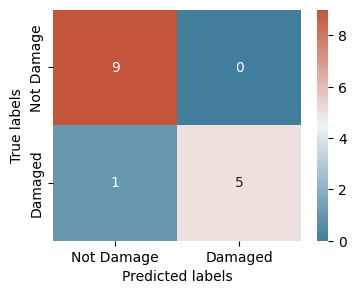

True Positive(TP)  =  5
False Positive(FP) =  0
True Negative(TN)  =  9
False Negative(FN) =  1
Accuracy of the binary classifier = 0.933


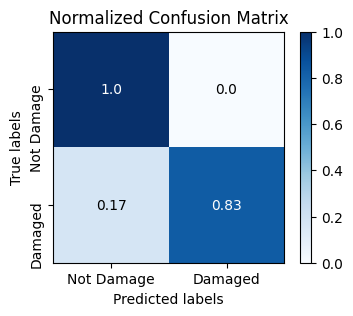

In [16]:
results = []
# perform K-Fold cross-validation and evaluate the model on the holdout set
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

    # initialize the classifier
    logistic_regression = LogisticRegression(solver='liblinear', C=25.0, random_state=0)

    logistic_regression.fit(X_train_kf, y_train_kf)
    y_pred_kf = logistic_regression.predict(X_val_kf)
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    results.append(accuracy_kf)
    print(f"Accuracy on validation set: {accuracy_kf:.2f}")
    
#print("results",results)
print(f"Mean-Accuracy: {sum(results) / len(results):.2f}")

y_pred_holdout = logistic_regression.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
print(f"Accuracy on holdout set: {accuracy_holdout:.2f}")

balanced_accuracy_holdout = balanced_accuracy_score(y_holdout, y_pred_holdout)
print(f"Balanced Accuracy on holdout set: {balanced_accuracy_holdout:.2f}")

print("\nClassification Report:\n")
print(classification_report(y_holdout, y_pred_holdout, digits = 3))

cm = confusion_matrix(y_holdout, y_pred_holdout)
heat_map(cm)
TN, FP, FN, TP = confusion_matrix(y_holdout, y_pred_holdout).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

heat_map_normalized(y_holdout, y_pred_holdout)

In [17]:
# Calculate performance metrics
accuracy = accuracy_score(y_holdout, y_pred_holdout) * 100
balanced_accuracy = balanced_accuracy_score(y_holdout, y_pred_holdout) * 100
auc = roc_auc_score(y_holdout, y_pred_holdout)
precision = precision_score(y_holdout, y_pred_holdout)
recall = recall_score(y_holdout, y_pred_holdout)
f1 = f1_score(y_holdout, y_pred_holdout)

# Print results
print(f"Accuracy: {accuracy:.2f}%")
print(f"Balanced Accuracy: {balanced_accuracy:.2f}%")
print(f"AUC: {auc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")

auc_min_max.append(round(auc, 2))

Accuracy: 93.33%
Balanced Accuracy: 91.67%
AUC: 0.92
Precision: 1.00
Recall: 0.83
F1 score: 0.91


Accuracy on validation set: 1.00
Accuracy on validation set: 1.00
Accuracy on validation set: 1.00
Mean-Accuracy: 1.00
Accuracy on holdout set: 1.00
Balanced Accuracy on holdout set: 1.00

Classification Report:

              precision    recall  f1-score   support

           0      1.000     1.000     1.000         9
           1      1.000     1.000     1.000         6

    accuracy                          1.000        15
   macro avg      1.000     1.000     1.000        15
weighted avg      1.000     1.000     1.000        15



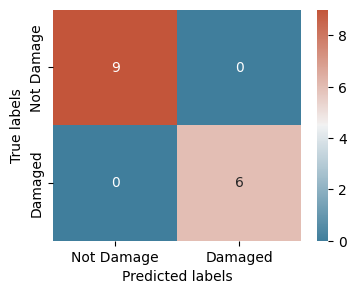

True Positive(TP)  =  6
False Positive(FP) =  0
True Negative(TN)  =  9
False Negative(FN) =  0
Accuracy of the binary classifier = 1.000


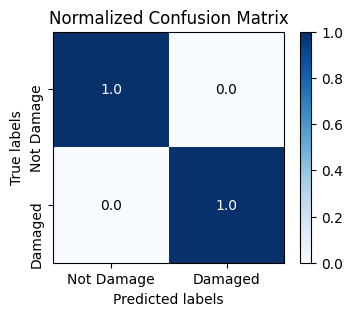

In [18]:
results = []
# perform K-Fold cross-validation and evaluate the model on the holdout set
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # initialize the classifier
    gaussian_nb = GaussianNB()

    gaussian_nb.fit(X_train_kf, y_train_kf)
    y_pred_kf = gaussian_nb.predict(X_val_kf)
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    results.append(accuracy_kf)
    print(f"Accuracy on validation set: {accuracy_kf:.2f}")

#print("results",results)
print(f"Mean-Accuracy: {sum(results) / len(results):.2f}")

y_pred_holdout = gaussian_nb.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
print(f"Accuracy on holdout set: {accuracy_holdout:.2f}")

balanced_accuracy_holdout = balanced_accuracy_score(y_holdout, y_pred_holdout)
print(f"Balanced Accuracy on holdout set: {balanced_accuracy_holdout:.2f}")

print("\nClassification Report:\n")
print(classification_report(y_holdout, y_pred_holdout, digits = 3))

cm = confusion_matrix(y_holdout, y_pred_holdout)
heat_map(cm)
TN, FP, FN, TP = confusion_matrix(y_holdout, y_pred_holdout).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

heat_map_normalized(y_holdout, y_pred_holdout)

In [19]:
# Calculate performance metrics
accuracy = accuracy_score(y_holdout, y_pred_holdout) * 100
balanced_accuracy = balanced_accuracy_score(y_holdout, y_pred_holdout) * 100
auc = roc_auc_score(y_holdout, y_pred_holdout)
precision = precision_score(y_holdout, y_pred_holdout)
recall = recall_score(y_holdout, y_pred_holdout)
f1 = f1_score(y_holdout, y_pred_holdout)

# Print results
print(f"Accuracy: {accuracy:.2f}%")
print(f"Balanced Accuracy: {balanced_accuracy:.2f}%")
print(f"AUC: {auc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")

auc_min_max.append(round(auc, 2))

Accuracy: 100.00%
Balanced Accuracy: 100.00%
AUC: 1.00
Precision: 1.00
Recall: 1.00
F1 score: 1.00


Accuracy on validation set: 0.73
Accuracy on validation set: 0.70
Accuracy on validation set: 0.89
Mean-Accuracy: 0.77
Accuracy on holdout set: 0.87
Balanced Accuracy on holdout set: 0.86

Classification Report:

              precision    recall  f1-score   support

           0      0.889     0.889     0.889         9
           1      0.833     0.833     0.833         6

    accuracy                          0.867        15
   macro avg      0.861     0.861     0.861        15
weighted avg      0.867     0.867     0.867        15



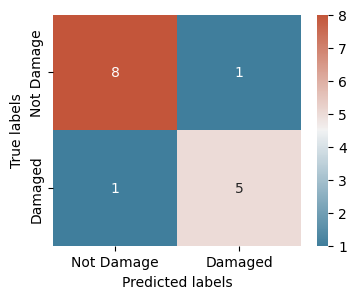

True Positive(TP)  =  5
False Positive(FP) =  1
True Negative(TN)  =  8
False Negative(FN) =  1
Accuracy of the binary classifier = 0.867


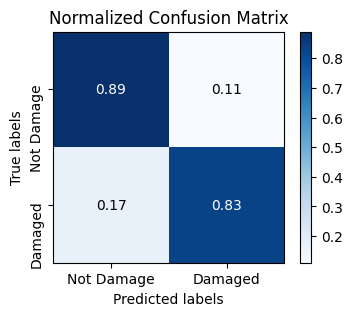

In [20]:
results = []
# perform K-Fold cross-validation and evaluate the model on the holdout set
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

    # initialize the classifier
    multinomial_nb = MultinomialNB()

    multinomial_nb.fit(X_train_kf, y_train_kf)
    y_pred_kf = multinomial_nb.predict(X_val_kf)
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    results.append(accuracy_kf)
    print(f"Accuracy on validation set: {accuracy_kf:.2f}")

#print("results",results)
print(f"Mean-Accuracy: {sum(results) / len(results):.2f}")

y_pred_holdout = multinomial_nb.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
print(f"Accuracy on holdout set: {accuracy_holdout:.2f}")

balanced_accuracy_holdout = balanced_accuracy_score(y_holdout, y_pred_holdout)
print(f"Balanced Accuracy on holdout set: {balanced_accuracy_holdout:.2f}")

print("\nClassification Report:\n")
print(classification_report(y_holdout, y_pred_holdout, digits = 3))

cm = confusion_matrix(y_holdout, y_pred_holdout)
heat_map(cm)
TN, FP, FN, TP = confusion_matrix(y_holdout, y_pred_holdout).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

heat_map_normalized(y_holdout, y_pred_holdout)

In [21]:
# Calculate performance metrics
accuracy = accuracy_score(y_holdout, y_pred_holdout) * 100
balanced_accuracy = balanced_accuracy_score(y_holdout, y_pred_holdout) * 100
auc = roc_auc_score(y_holdout, y_pred_holdout)
precision = precision_score(y_holdout, y_pred_holdout)
recall = recall_score(y_holdout, y_pred_holdout)
f1 = f1_score(y_holdout, y_pred_holdout)

# Print results
print(f"Accuracy: {accuracy:.2f}%")
print(f"Balanced Accuracy: {balanced_accuracy:.2f}%")
print(f"AUC: {auc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")

auc_min_max.append(round(auc, 2))

Accuracy: 86.67%
Balanced Accuracy: 86.11%
AUC: 0.86
Precision: 0.83
Recall: 0.83
F1 score: 0.83


Accuracy on validation set: 0.91
Accuracy on validation set: 0.84
Accuracy on validation set: 0.95
Mean-Accuracy: 0.90
Accuracy on holdout set: 0.80
Balanced Accuracy on holdout set: 0.75

Classification Report:

              precision    recall  f1-score   support

           0      0.750     1.000     0.857         9
           1      1.000     0.500     0.667         6

    accuracy                          0.800        15
   macro avg      0.875     0.750     0.762        15
weighted avg      0.850     0.800     0.781        15



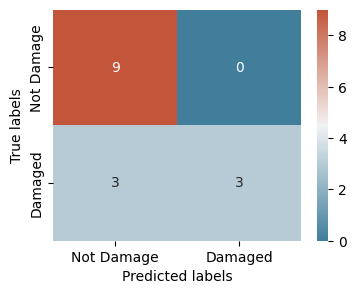

True Positive(TP)  =  3
False Positive(FP) =  0
True Negative(TN)  =  9
False Negative(FN) =  3
Accuracy of the binary classifier = 0.800


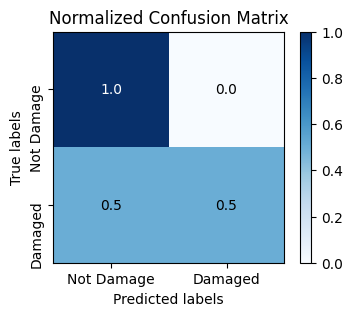

In [22]:
results = []
# perform K-Fold cross-validation and evaluate the model on the holdout set
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # initialize the classifier
    lda = LinearDiscriminantAnalysis()

    lda.fit(X_train_kf, y_train_kf)
    y_pred_kf = lda.predict(X_val_kf)
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    results.append(accuracy_kf)
    print(f"Accuracy on validation set: {accuracy_kf:.2f}")

#print("results",results)
print(f"Mean-Accuracy: {sum(results) / len(results):.2f}")

y_pred_holdout = lda.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
print(f"Accuracy on holdout set: {accuracy_holdout:.2f}")

balanced_accuracy_holdout = balanced_accuracy_score(y_holdout, y_pred_holdout)
print(f"Balanced Accuracy on holdout set: {balanced_accuracy_holdout:.2f}")

print("\nClassification Report:\n")
print(classification_report(y_holdout, y_pred_holdout, digits = 3))

cm = confusion_matrix(y_holdout, y_pred_holdout)
heat_map(cm)
TN, FP, FN, TP = confusion_matrix(y_holdout, y_pred_holdout).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

heat_map_normalized(y_holdout, y_pred_holdout)

In [23]:
# Calculate performance metrics
accuracy = accuracy_score(y_holdout, y_pred_holdout) * 100
balanced_accuracy = balanced_accuracy_score(y_holdout, y_pred_holdout) * 100
auc = roc_auc_score(y_holdout, y_pred_holdout)
precision = precision_score(y_holdout, y_pred_holdout)
recall = recall_score(y_holdout, y_pred_holdout)
f1 = f1_score(y_holdout, y_pred_holdout)

# Print results
print(f"Accuracy: {accuracy:.2f}%")
print(f"Balanced Accuracy: {balanced_accuracy:.2f}%")
print(f"AUC: {auc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")

auc_min_max.append(round(auc, 2))

Accuracy: 80.00%
Balanced Accuracy: 75.00%
AUC: 0.75
Precision: 1.00
Recall: 0.50
F1 score: 0.67


Accuracy on validation set: 0.87
Accuracy on validation set: 0.84
Accuracy on validation set: 0.93
Mean-Accuracy: 0.88
Accuracy on holdout set: 0.93
Balanced Accuracy on holdout set: 0.92

Classification Report:

              precision    recall  f1-score   support

           0      0.900     1.000     0.947         9
           1      1.000     0.833     0.909         6

    accuracy                          0.933        15
   macro avg      0.950     0.917     0.928        15
weighted avg      0.940     0.933     0.932        15



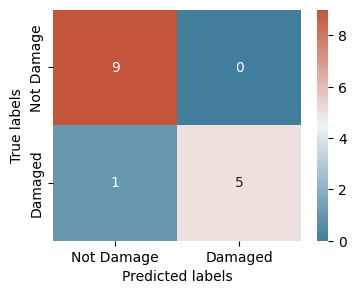

True Positive(TP)  =  5
False Positive(FP) =  0
True Negative(TN)  =  9
False Negative(FN) =  1
Accuracy of the binary classifier = 0.933


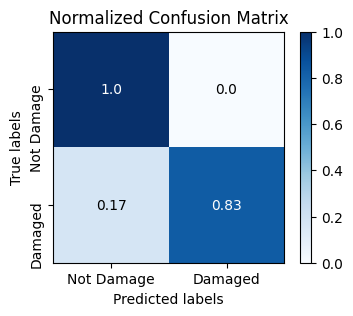

In [24]:
results = []
# perform K-Fold cross-validation and evaluate the model on the holdout set
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # initialize the classifier
    knn = KNeighborsClassifier(n_neighbors=1)

    knn.fit(X_train_kf, y_train_kf)
    y_pred_kf = knn.predict(X_val_kf)
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    results.append(accuracy_kf)
    print(f"Accuracy on validation set: {accuracy_kf:.2f}")

#print("results",results)
print(f"Mean-Accuracy: {sum(results) / len(results):.2f}")

y_pred_holdout = knn.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
print(f"Accuracy on holdout set: {accuracy_holdout:.2f}")

balanced_accuracy_holdout = balanced_accuracy_score(y_holdout, y_pred_holdout)
print(f"Balanced Accuracy on holdout set: {balanced_accuracy_holdout:.2f}")

print("\nClassification Report:\n")
print(classification_report(y_holdout, y_pred_holdout, digits = 3))

cm = confusion_matrix(y_holdout, y_pred_holdout)
heat_map(cm)
TN, FP, FN, TP = confusion_matrix(y_holdout, y_pred_holdout).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

heat_map_normalized(y_holdout, y_pred_holdout)

In [25]:
# Calculate performance metrics
accuracy = accuracy_score(y_holdout, y_pred_holdout) * 100
balanced_accuracy = balanced_accuracy_score(y_holdout, y_pred_holdout) * 100
auc = roc_auc_score(y_holdout, y_pred_holdout)
precision = precision_score(y_holdout, y_pred_holdout)
recall = recall_score(y_holdout, y_pred_holdout)
f1 = f1_score(y_holdout, y_pred_holdout)

# Print results
print(f"Accuracy: {accuracy:.2f}%")
print(f"Balanced Accuracy: {balanced_accuracy:.2f}%")
print(f"AUC: {auc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")

auc_min_max.append(round(auc, 2))

Accuracy: 93.33%
Balanced Accuracy: 91.67%
AUC: 0.92
Precision: 1.00
Recall: 0.83
F1 score: 0.91


Accuracy on validation set: 0.82
Accuracy on validation set: 0.80
Accuracy on validation set: 0.93
Mean-Accuracy: 0.85
Accuracy on holdout set: 0.87
Balanced Accuracy on holdout set: 0.83

Classification Report:

              precision    recall  f1-score   support

           0      0.818     1.000     0.900         9
           1      1.000     0.667     0.800         6

    accuracy                          0.867        15
   macro avg      0.909     0.833     0.850        15
weighted avg      0.891     0.867     0.860        15



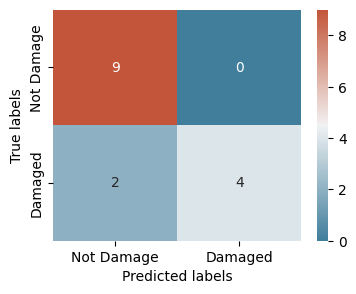

True Positive(TP)  =  4
False Positive(FP) =  0
True Negative(TN)  =  9
False Negative(FN) =  2
Accuracy of the binary classifier = 0.867


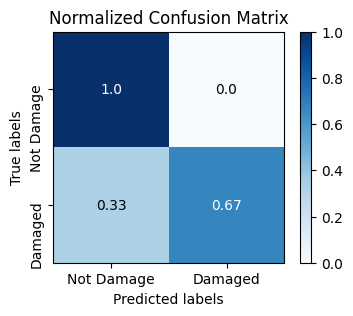

In [26]:
results = []
# perform K-Fold cross-validation and evaluate the model on the holdout set
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # initialize the classifier
    knn = KNeighborsClassifier(n_neighbors=2)

    knn.fit(X_train_kf, y_train_kf)
    y_pred_kf = knn.predict(X_val_kf)
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    results.append(accuracy_kf)
    print(f"Accuracy on validation set: {accuracy_kf:.2f}")

#print("results",results)
print(f"Mean-Accuracy: {sum(results) / len(results):.2f}")

y_pred_holdout = knn.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
print(f"Accuracy on holdout set: {accuracy_holdout:.2f}")

balanced_accuracy_holdout = balanced_accuracy_score(y_holdout, y_pred_holdout)
print(f"Balanced Accuracy on holdout set: {balanced_accuracy_holdout:.2f}")

print("\nClassification Report:\n")
print(classification_report(y_holdout, y_pred_holdout, digits = 3))

cm = confusion_matrix(y_holdout, y_pred_holdout)
heat_map(cm)
TN, FP, FN, TP = confusion_matrix(y_holdout, y_pred_holdout).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

heat_map_normalized(y_holdout, y_pred_holdout)

In [27]:
# Calculate performance metrics
accuracy = accuracy_score(y_holdout, y_pred_holdout) * 100
balanced_accuracy = balanced_accuracy_score(y_holdout, y_pred_holdout) * 100
auc = roc_auc_score(y_holdout, y_pred_holdout)
precision = precision_score(y_holdout, y_pred_holdout)
recall = recall_score(y_holdout, y_pred_holdout)
f1 = f1_score(y_holdout, y_pred_holdout)

# Print results
print(f"Accuracy: {accuracy:.2f}%")
print(f"Balanced Accuracy: {balanced_accuracy:.2f}%")
print(f"AUC: {auc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")

auc_min_max.append(round(auc, 2))

Accuracy: 86.67%
Balanced Accuracy: 83.33%
AUC: 0.83
Precision: 1.00
Recall: 0.67
F1 score: 0.80


Accuracy on validation set: 0.91
Accuracy on validation set: 0.82
Accuracy on validation set: 0.95
Mean-Accuracy: 0.89
Accuracy on holdout set: 0.87
Balanced Accuracy on holdout set: 0.86

Classification Report:

              precision    recall  f1-score   support

           0      0.889     0.889     0.889         9
           1      0.833     0.833     0.833         6

    accuracy                          0.867        15
   macro avg      0.861     0.861     0.861        15
weighted avg      0.867     0.867     0.867        15



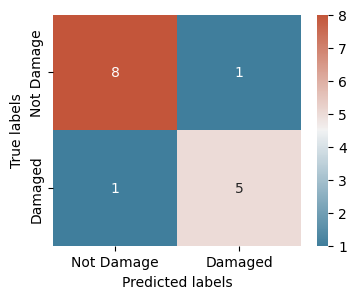

True Positive(TP)  =  5
False Positive(FP) =  1
True Negative(TN)  =  8
False Negative(FN) =  1
Accuracy of the binary classifier = 0.867


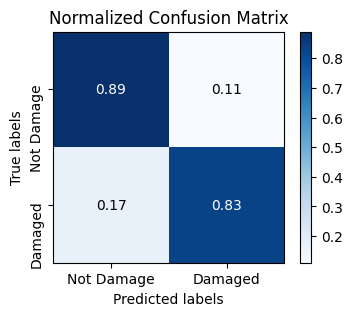

In [28]:
results = []
# perform K-Fold cross-validation and evaluate the model on the holdout set
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # initialize the classifier
    knn = KNeighborsClassifier(n_neighbors=3)

    knn.fit(X_train_kf, y_train_kf)
    y_pred_kf = knn.predict(X_val_kf)
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    results.append(accuracy_kf)
    print(f"Accuracy on validation set: {accuracy_kf:.2f}")

#print("results",results)
print(f"Mean-Accuracy: {sum(results) / len(results):.2f}")

y_pred_holdout = knn.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
print(f"Accuracy on holdout set: {accuracy_holdout:.2f}")

balanced_accuracy_holdout = balanced_accuracy_score(y_holdout, y_pred_holdout)
print(f"Balanced Accuracy on holdout set: {balanced_accuracy_holdout:.2f}")

print("\nClassification Report:\n")
print(classification_report(y_holdout, y_pred_holdout, digits = 3))

cm = confusion_matrix(y_holdout, y_pred_holdout)
heat_map(cm)
TN, FP, FN, TP = confusion_matrix(y_holdout, y_pred_holdout).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

heat_map_normalized(y_holdout, y_pred_holdout)

In [29]:
# Calculate performance metrics
accuracy = accuracy_score(y_holdout, y_pred_holdout) * 100
balanced_accuracy = balanced_accuracy_score(y_holdout, y_pred_holdout) * 100
auc = roc_auc_score(y_holdout, y_pred_holdout)
precision = precision_score(y_holdout, y_pred_holdout)
recall = recall_score(y_holdout, y_pred_holdout)
f1 = f1_score(y_holdout, y_pred_holdout)

# Print results
print(f"Accuracy: {accuracy:.2f}%")
print(f"Balanced Accuracy: {balanced_accuracy:.2f}%")
print(f"AUC: {auc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")

auc_min_max.append(round(auc, 2))

Accuracy: 86.67%
Balanced Accuracy: 86.11%
AUC: 0.86
Precision: 0.83
Recall: 0.83
F1 score: 0.83


Accuracy on validation set: 1.00
Accuracy on validation set: 1.00
Accuracy on validation set: 1.00
Mean-Accuracy: 1.00
Accuracy on holdout set: 1.00
Balanced Accuracy on holdout set: 1.00

Classification Report:

              precision    recall  f1-score   support

           0      1.000     1.000     1.000         9
           1      1.000     1.000     1.000         6

    accuracy                          1.000        15
   macro avg      1.000     1.000     1.000        15
weighted avg      1.000     1.000     1.000        15



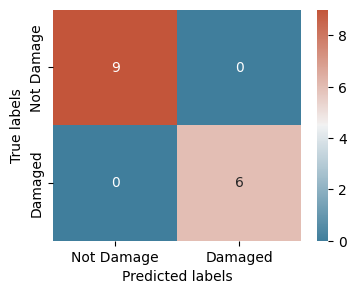

True Positive(TP)  =  6
False Positive(FP) =  0
True Negative(TN)  =  9
False Negative(FN) =  0
Accuracy of the binary classifier = 1.000


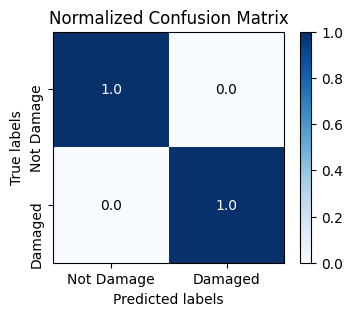

In [30]:
results = []
# perform K-Fold cross-validation and evaluate the model on the holdout set
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # initialize the classifier
    dtc = DecisionTreeClassifier()

    dtc.fit(X_train_kf, y_train_kf)
    y_pred_kf = dtc.predict(X_val_kf)
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    results.append(accuracy_kf)
    print(f"Accuracy on validation set: {accuracy_kf:.2f}")

#print("results",results)
print(f"Mean-Accuracy: {sum(results) / len(results):.2f}")

y_pred_holdout = dtc.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
print(f"Accuracy on holdout set: {accuracy_holdout:.2f}")

balanced_accuracy_holdout = balanced_accuracy_score(y_holdout, y_pred_holdout)
print(f"Balanced Accuracy on holdout set: {balanced_accuracy_holdout:.2f}")

print("\nClassification Report:\n")
print(classification_report(y_holdout, y_pred_holdout, digits = 3))

cm = confusion_matrix(y_holdout, y_pred_holdout)
heat_map(cm)
TN, FP, FN, TP = confusion_matrix(y_holdout, y_pred_holdout).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

heat_map_normalized(y_holdout, y_pred_holdout)

In [31]:
# Calculate performance metrics
accuracy = accuracy_score(y_holdout, y_pred_holdout) * 100
balanced_accuracy = balanced_accuracy_score(y_holdout, y_pred_holdout) * 100
auc = roc_auc_score(y_holdout, y_pred_holdout)
precision = precision_score(y_holdout, y_pred_holdout)
recall = recall_score(y_holdout, y_pred_holdout)
f1 = f1_score(y_holdout, y_pred_holdout)

# Print results
print(f"Accuracy: {accuracy:.2f}%")
print(f"Balanced Accuracy: {balanced_accuracy:.2f}%")
print(f"AUC: {auc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")

auc_min_max.append(round(auc, 2))

Accuracy: 100.00%
Balanced Accuracy: 100.00%
AUC: 1.00
Precision: 1.00
Recall: 1.00
F1 score: 1.00


Accuracy on validation set: 0.93
Accuracy on validation set: 0.95
Accuracy on validation set: 0.95
Mean-Accuracy: 0.95
Accuracy on holdout set: 0.93
Balanced Accuracy on holdout set: 0.94

Classification Report:

              precision    recall  f1-score   support

           0      1.000     0.889     0.941         9
           1      0.857     1.000     0.923         6

    accuracy                          0.933        15
   macro avg      0.929     0.944     0.932        15
weighted avg      0.943     0.933     0.934        15



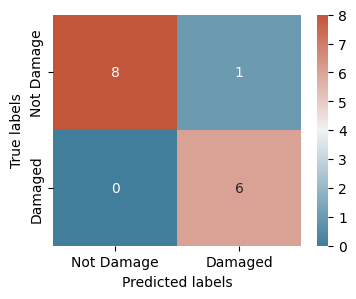

True Positive(TP)  =  6
False Positive(FP) =  1
True Negative(TN)  =  8
False Negative(FN) =  0
Accuracy of the binary classifier = 0.933


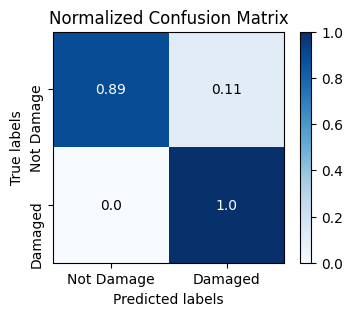

In [32]:
results = []
# perform K-Fold cross-validation and evaluate the model on the holdout set
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # initialize the classifier
    rfc = RandomForestClassifier()

    rfc.fit(X_train_kf, y_train_kf)
    y_pred_kf = rfc.predict(X_val_kf)
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    results.append(accuracy_kf)
    print(f"Accuracy on validation set: {accuracy_kf:.2f}")

#print("results",results)
print(f"Mean-Accuracy: {sum(results) / len(results):.2f}")

y_pred_holdout = rfc.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
print(f"Accuracy on holdout set: {accuracy_holdout:.2f}")

balanced_accuracy_holdout = balanced_accuracy_score(y_holdout, y_pred_holdout)
print(f"Balanced Accuracy on holdout set: {balanced_accuracy_holdout:.2f}")

print("\nClassification Report:\n")
print(classification_report(y_holdout, y_pred_holdout, digits = 3))

cm = confusion_matrix(y_holdout, y_pred_holdout)
heat_map(cm)
TN, FP, FN, TP = confusion_matrix(y_holdout, y_pred_holdout).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

heat_map_normalized(y_holdout, y_pred_holdout)

In [33]:
# Calculate performance metrics
accuracy = accuracy_score(y_holdout, y_pred_holdout) * 100
balanced_accuracy = balanced_accuracy_score(y_holdout, y_pred_holdout) * 100
auc = roc_auc_score(y_holdout, y_pred_holdout)
precision = precision_score(y_holdout, y_pred_holdout)
recall = recall_score(y_holdout, y_pred_holdout)
f1 = f1_score(y_holdout, y_pred_holdout)

# Print results
print(f"Accuracy: {accuracy:.2f}%")
print(f"Balanced Accuracy: {balanced_accuracy:.2f}%")
print(f"AUC: {auc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")

auc_min_max.append(round(auc, 2))

Accuracy: 93.33%
Balanced Accuracy: 94.44%
AUC: 0.94
Precision: 0.86
Recall: 1.00
F1 score: 0.92


Accuracy on validation set: 0.87
Accuracy on validation set: 0.95
Accuracy on validation set: 0.98
Mean-Accuracy: 0.93
Accuracy on holdout set: 0.93
Balanced Accuracy on holdout set: 0.92

Classification Report:

              precision    recall  f1-score   support

           0      0.900     1.000     0.947         9
           1      1.000     0.833     0.909         6

    accuracy                          0.933        15
   macro avg      0.950     0.917     0.928        15
weighted avg      0.940     0.933     0.932        15



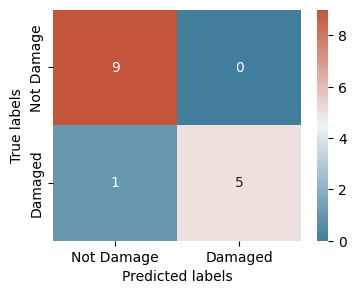

True Positive(TP)  =  5
False Positive(FP) =  0
True Negative(TN)  =  9
False Negative(FN) =  1
Accuracy of the binary classifier = 0.933


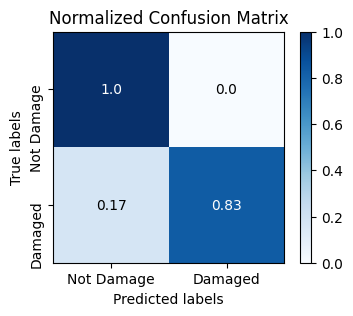

In [34]:
results = []
# perform K-Fold cross-validation and evaluate the model on the holdout set
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # initialize the classifier
    svc = SVC(kernel='linear')

    svc.fit(X_train_kf, y_train_kf)
    y_pred_kf = svc.predict(X_val_kf)
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    results.append(accuracy_kf)
    print(f"Accuracy on validation set: {accuracy_kf:.2f}")

#print("results",results)
print(f"Mean-Accuracy: {sum(results) / len(results):.2f}")

y_pred_holdout = svc.predict(X_holdout)
accuracy_holdout = accuracy_score(y_holdout, y_pred_holdout)
print(f"Accuracy on holdout set: {accuracy_holdout:.2f}")

balanced_accuracy_holdout = balanced_accuracy_score(y_holdout, y_pred_holdout)
print(f"Balanced Accuracy on holdout set: {balanced_accuracy_holdout:.2f}")

print("\nClassification Report:\n")
print(classification_report(y_holdout, y_pred_holdout, digits = 3))

cm = confusion_matrix(y_holdout, y_pred_holdout)
heat_map(cm)
TN, FP, FN, TP = confusion_matrix(y_holdout, y_pred_holdout).ravel()
print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

heat_map_normalized(y_holdout, y_pred_holdout)

In [35]:
# Calculate performance metrics
accuracy = accuracy_score(y_holdout, y_pred_holdout) * 100
balanced_accuracy = balanced_accuracy_score(y_holdout, y_pred_holdout) * 100
auc = roc_auc_score(y_holdout, y_pred_holdout)
precision = precision_score(y_holdout, y_pred_holdout)
recall = recall_score(y_holdout, y_pred_holdout)
f1 = f1_score(y_holdout, y_pred_holdout)

# Print results
print(f"Accuracy: {accuracy:.2f}%")
print(f"Balanced Accuracy: {balanced_accuracy:.2f}%")
print(f"AUC: {auc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")

auc_min_max.append(round(auc, 2))

Accuracy: 93.33%
Balanced Accuracy: 91.67%
AUC: 0.92
Precision: 1.00
Recall: 0.83
F1 score: 0.91


In [36]:
auc = 0.86
auc_min_max.append(round(auc, 2))

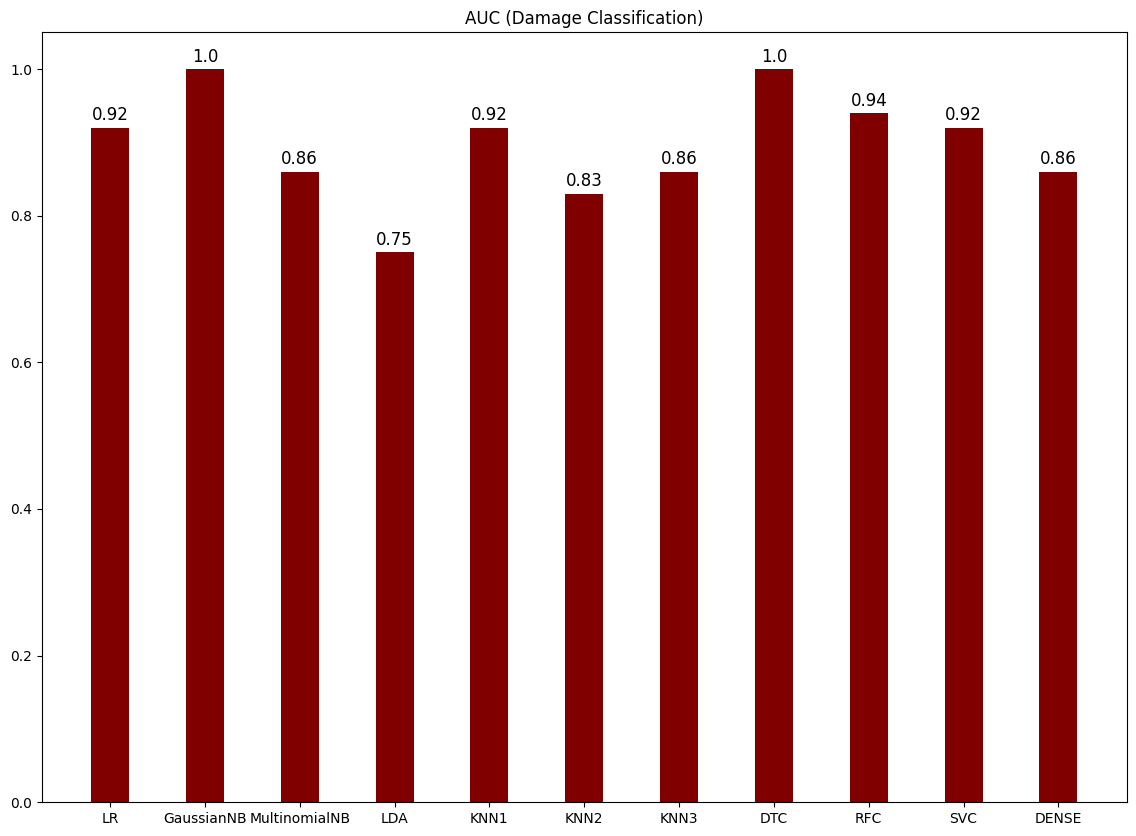

In [37]:
#AUC
data = {'LR':auc_min_max[0], 'GaussianNB':auc_min_max[1], 'MultinomialNB':auc_min_max[2], 'LDA':auc_min_max[3],
        'KNN1':auc_min_max[4], 'KNN2':auc_min_max[5], 'KNN3':auc_min_max[6], 'DTC':auc_min_max[7],
        'RFC':auc_min_max[8], 'SVC':auc_min_max[9], 'DENSE':auc_min_max[10]}

plot_accuracy("AUC (Damage Classification)", data)

In [38]:
#STOP